In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score



In [39]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ["Area", "Perimeter","Compactness", "Kernel_Length", "Kernel_Width", "Asymmetry_Coeff", "Kernel_Groove", "Class"]


seeds = pd.read_csv(url, sep=r"\s+", header=None, names=columns)


X = seeds.iloc[:, :-1]  # the first 7 colums are the features 
y = seeds.iloc[:, -1] - 1  # Ensures that the label is the last column and starts at 0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
X_train.describe()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,14.803946,14.551088,0.869377,5.631000,3.249163,3.745905,5.413116
std,2.917547,1.305426,0.024145,0.444211,0.379520,1.477194,0.495974
min,10.590000,12.410000,0.808100,4.899000,2.641000,0.765100,4.519000
25%,12.240000,13.455000,0.855750,5.272500,2.932000,2.699500,5.044000
50%,14.280000,14.210000,0.871600,5.504000,3.201000,3.619000,5.263000
75%,17.435000,15.755000,0.886750,5.993000,3.557500,4.865000,5.879000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [40]:
clf = DecisionTreeClassifier(random_state=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

Accuracy: 0.9206349206349206
Cross Validation Scores: 0.8952380952380953
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.95      0.91      0.93        23
           2       0.94      0.94      0.94        18

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



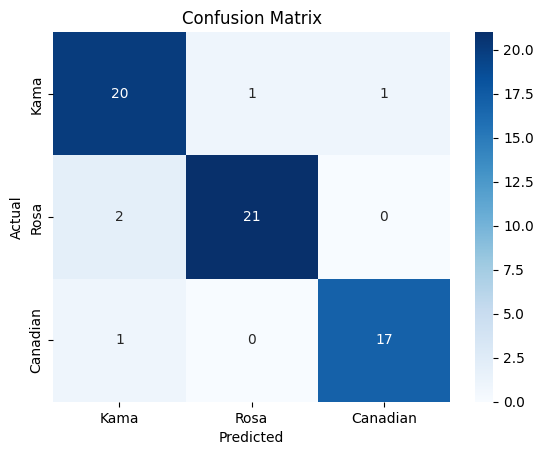

In [41]:
y_pred = clf.predict(X_test)
cross_scores = cross_val_score(clf, X, y, cv=5)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Cross Validation Scores:", cross_scores.mean())
print("Classification Report:\n", classification_report(y_test, y_pred))
class_names = ["Kama", "Rosa", "Canadian"]

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

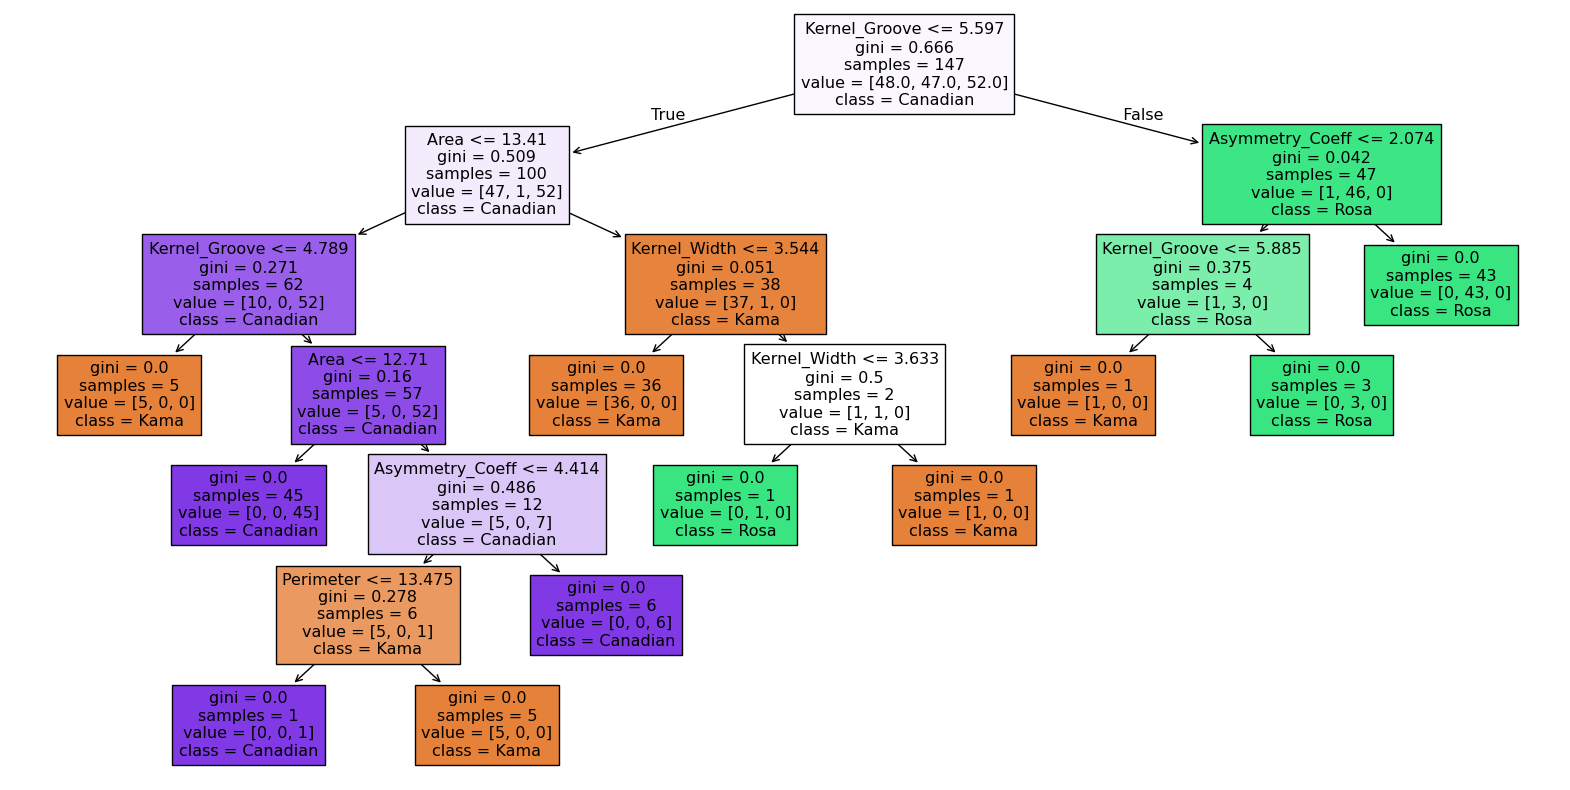

In [42]:
# plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=columns[:-1], class_names=class_names, filled=True)
plt.show()
